# Description of the final project

## Introduction

In this project, you are going to work with the dataset based on the census data extracted from the 1994 and 1995 current population surveys conducted by the U.S. Census Bureau. Your goal is to predict level of income of a person: "- 50000" (means less than \$50k/year) or "50000+" (means more than \$50k/year). The data is split into train (`train.csv`) and test (`test.csv`) parts. You should use train part to train the models, and test part to estimate their final quality. The best quality on the test dataset should be your final result.

The description of the data is available here: https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29

_Citation:_

* _Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science._

## Detailed Task Description

The solution should have the following parts:

### [25%] 1. Data exploration

* 1.1. (8%) Which metric are you going to use to evaluate the performance of the model and why?
* 1.2. (8%) Which validation strategy are you going to use and why? Apply it to the data on the preprocessing step
* 1.3. (9%) Explore which features do you have, what is their distribution and connection to the target. Perform feature selection techniques such as PCA, and feature engineering, if necessary. Explain your decisions

### [25%] 2. Data preprocessing

* 2.1. (8%) Fill missing values (if there are any)
* 2.2. (9%) Properly encode categorical features. Explain your choice of methods of categorical feature encoding
* 2.3. (8%) Cluster observations and add cluster number as one of the features. Make sure that the clustering method has a good quality

### [25%] 3. Model training

* 3.1. (8%) Apply different techniques which can help to work with imbalanced data. You are supposed to try at least 2 techniques (in the end, you don't have to include them into your final pipeline - but you should explain why)
* 3.2. (9%) Train different machine learning models, including the advanced boosting algorithms studied during the course. Carefully tune hyperparameters of the algorithms. You are supposed to compare at least 3 models
* 3.3. (8%) Perform blending or stacking of the trained machine learning algorithms. Carefully tune the weights of the ensemble

### [25%] 4. Summary

* 4.1. (8%) Estimate the quality of the models and their ensemble on the test set. Describe the results. Which model is the best?
* 4.2. (8%) Interpret the best single model and the ensemble. Use at least 2 model interpretation techniques. Explain, why your models have good quality (or bad quality)
* 4.3. (9%) Summarize your results and write a conclusion. What have you found in the data, which techniques did you use? Which methods and models worked best in your task? Can you explain in simple words why should we trust your final model?

### General Requirements

* You should provide a solution in the form of the Jupyter Notebook with code cells and markdown cells (with text)
* Make sure that the instructor can run all the cells to reproduce your results
* Clearly answer each question, perform the required actions from the task. Explain your decisions if you choose to use some techniques
* Support all your statements with calculations and plots. For instance, if you claim that the dataset does not have missing values, you need to provide the code which shows that the total number of missing values is zero

In [92]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data exploration¶

In [17]:
test_data  = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')
total_data = test_data.append(train_data)

total_data.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,target
0,14,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,- 50000.
1,42,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,13,- 50000.
2,49,Private,9,35,High school graduate,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,- 50000.
3,19,Local government,40,28,High school graduate,0,Not in universe,Never married,Entertainment,Protective services,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,34,- 50000.
4,57,Private,33,24,High school graduate,0,Not in universe,Married-civilian spouse present,Retail trade,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,- 50000.


In [18]:
print(test_data.shape)
print(train_data.shape)

print(test_data.shape[0] / (total_data.shape[0]))

(99762, 40)
(199523, 40)
0.3333344470989191


In [19]:
total_data['target'] = total_data['target'].map({' - 50000.' : 0, ' 50000+.' : 1})

In [20]:
total_data.dtypes.value_counts()

object    28
int64     12
dtype: int64

In [21]:
total_data['target'].unique()

array([0, 1])

In [22]:
total_data.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,target
0,14,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,0
1,42,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,13,0
2,49,Private,9,35,High school graduate,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,0
3,19,Local government,40,28,High school graduate,0,Not in universe,Never married,Entertainment,Protective services,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,34,0
4,57,Private,33,24,High school graduate,0,Not in universe,Married-civilian spouse present,Retail trade,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,0


In [24]:
def plot(column):
    if total_data[column].dtype != 'int64':
        f, axes = plt.subplots(1, 1, figsize=(15,5))
        sns.countplot(x=column, hue='target', data = total_data)
        plt.xticks(rotation=90)
        plt.suptitle(column, fontsize=20)
        plt.show()
    else:
        g = sns.FacetGrid(total_data, row="target", margin_titles=True, aspect=4, height=3)
        g.map(plt.hist, column, bins=100)
        plt.show()
        
    plt.show()

AAGE


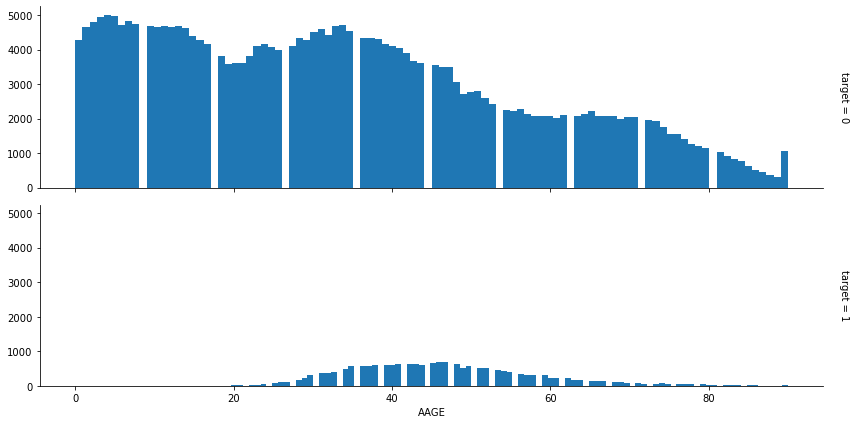

ACLSWKR


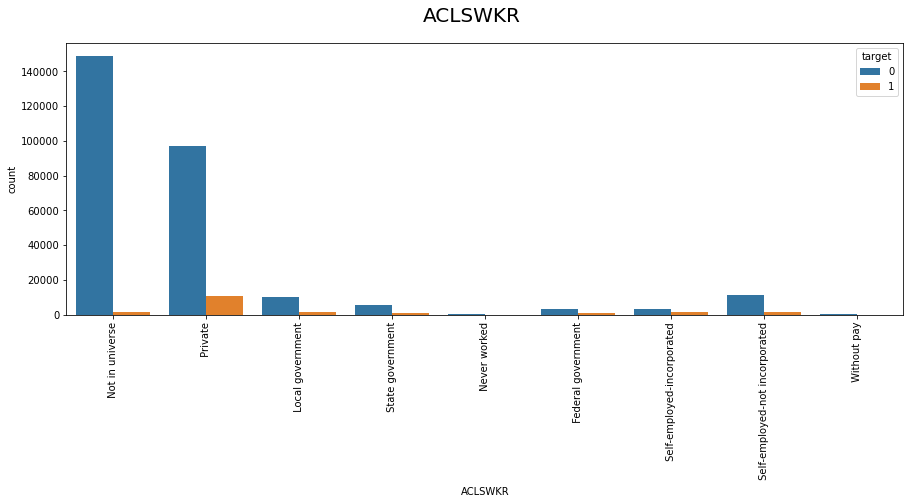

ADTIND


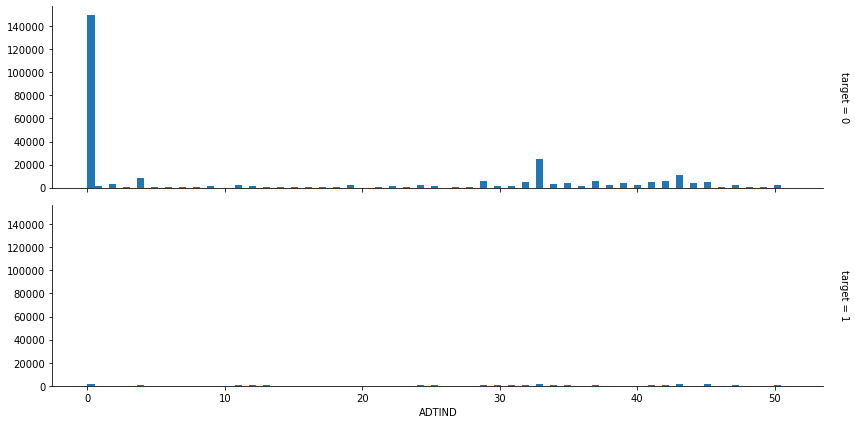

ADTOCC


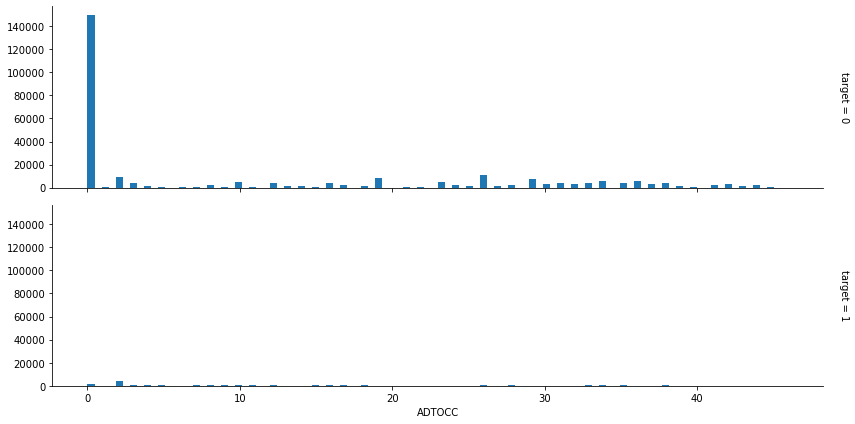

AHGA


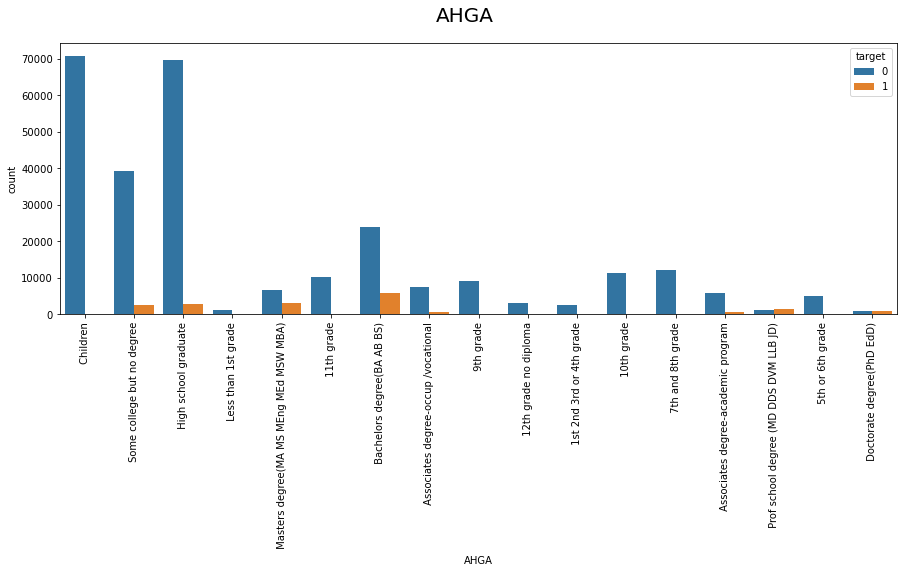

AHRSPAY


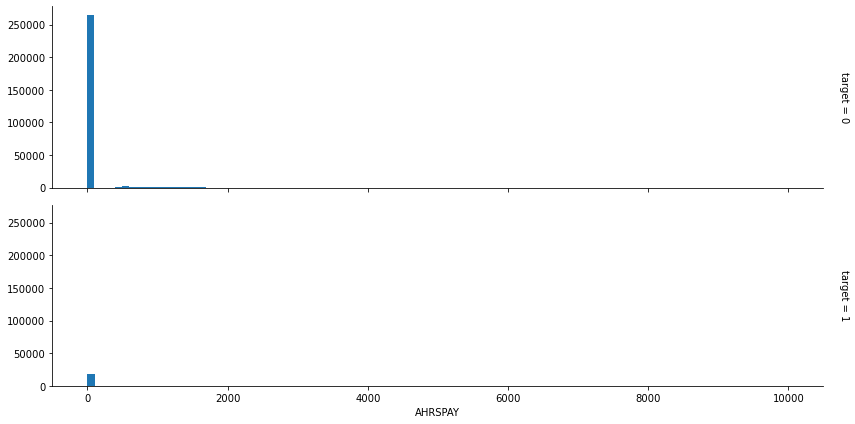

AHSCOL


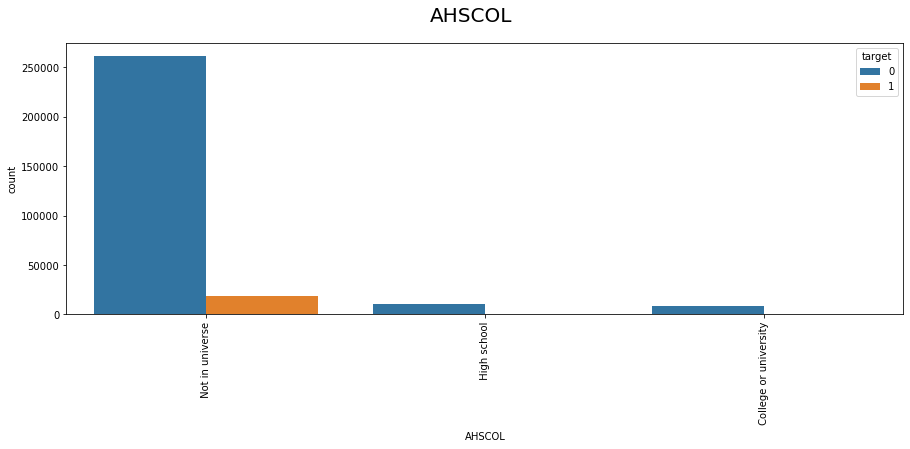

AMARITL


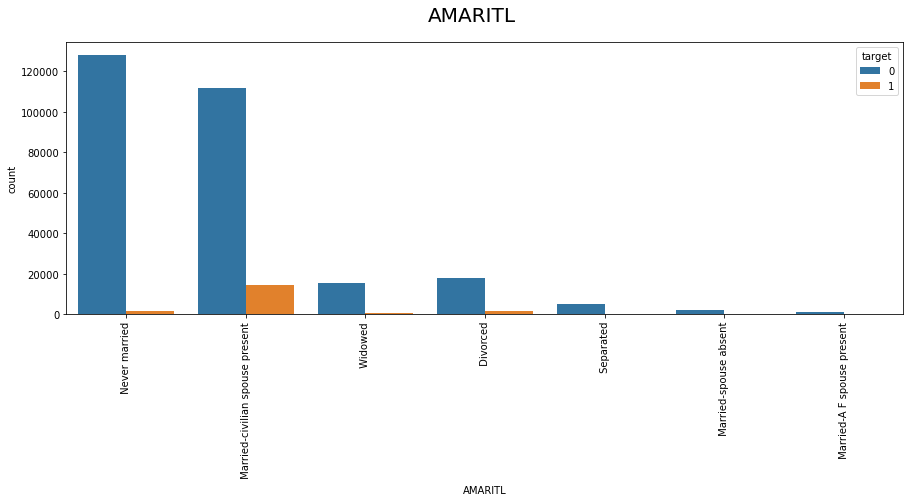

AMJIND


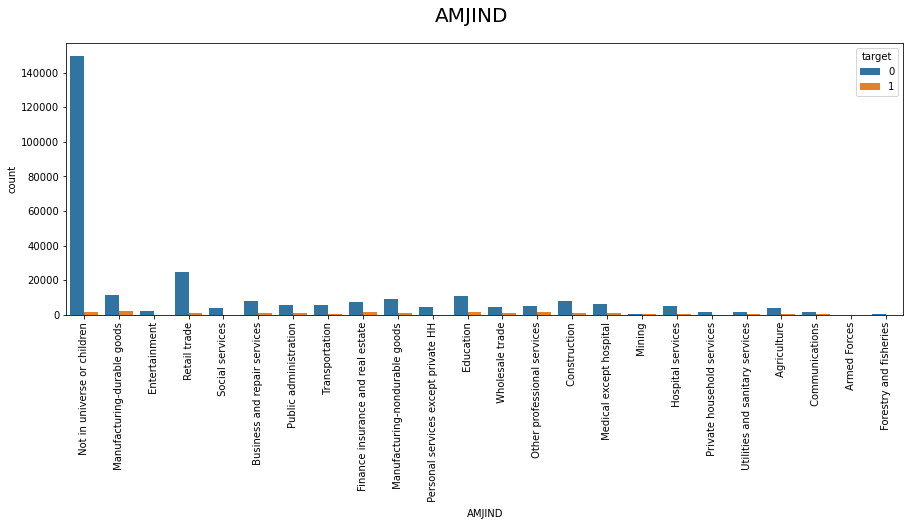

AMJOCC


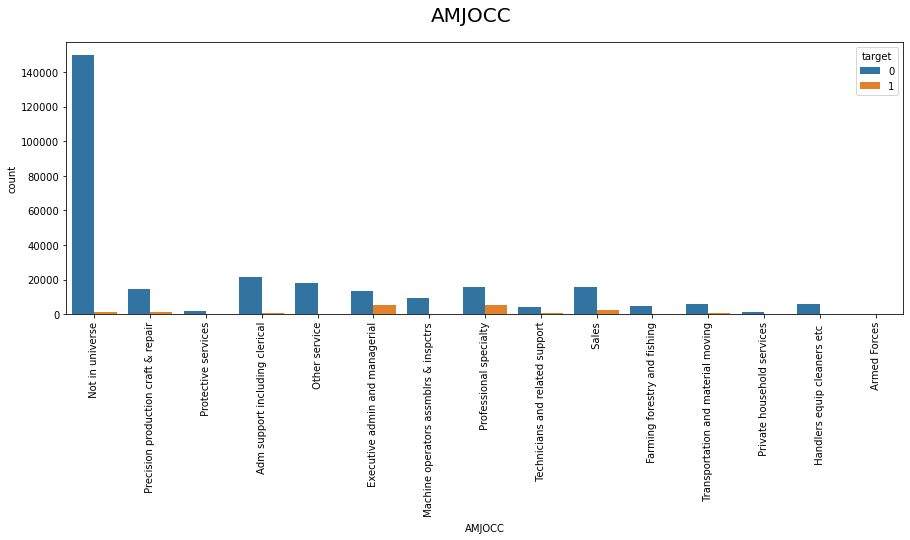

ARACE


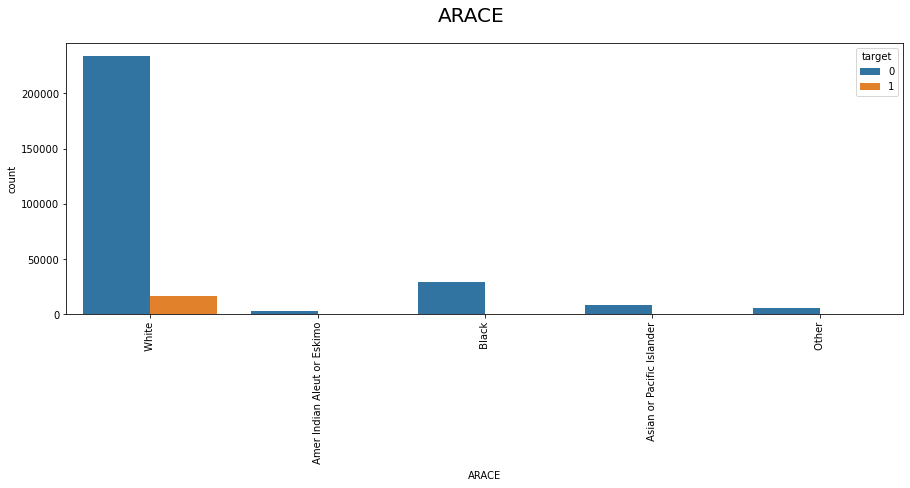

AREORGN


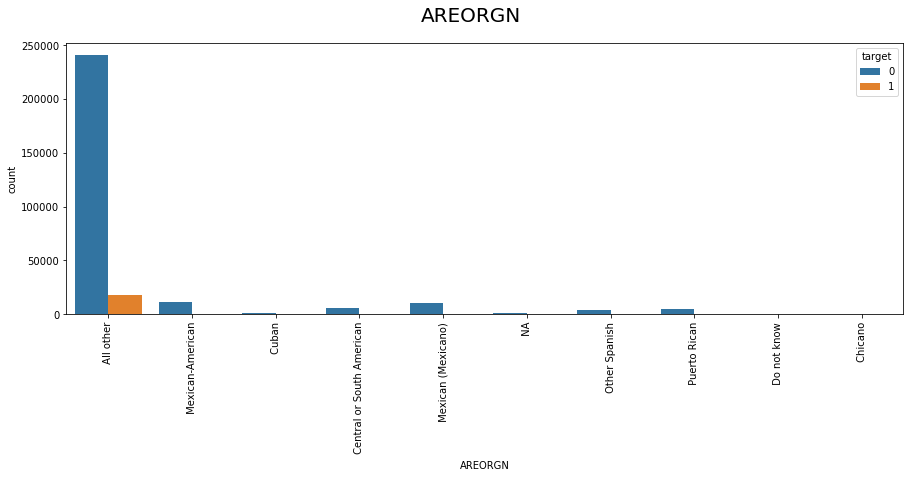

ASEX


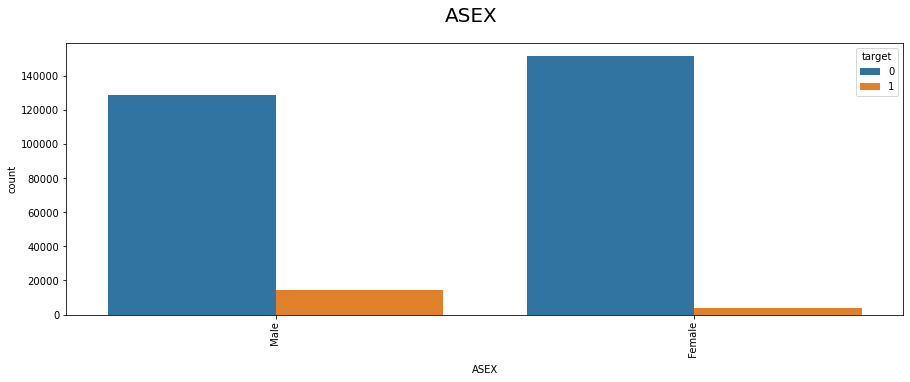

AUNMEM


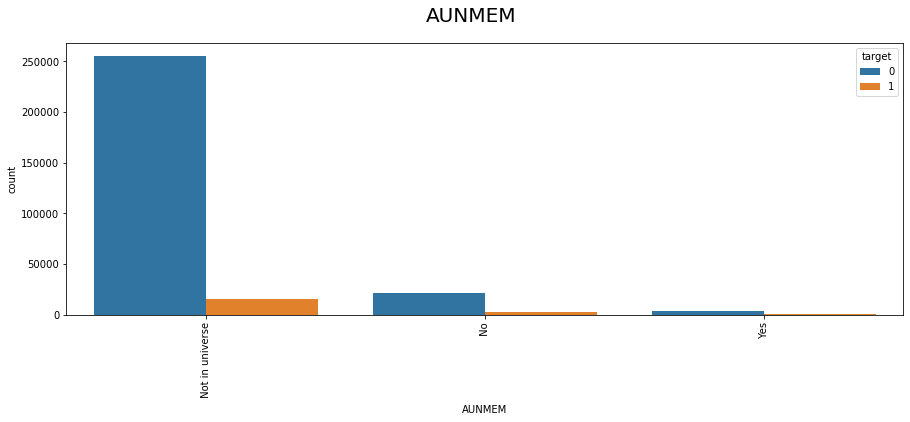

AUNTYPE


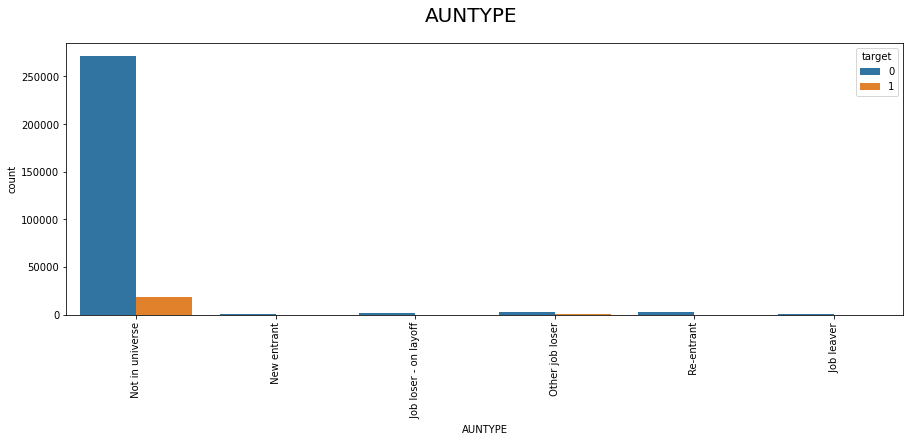

AWKSTAT


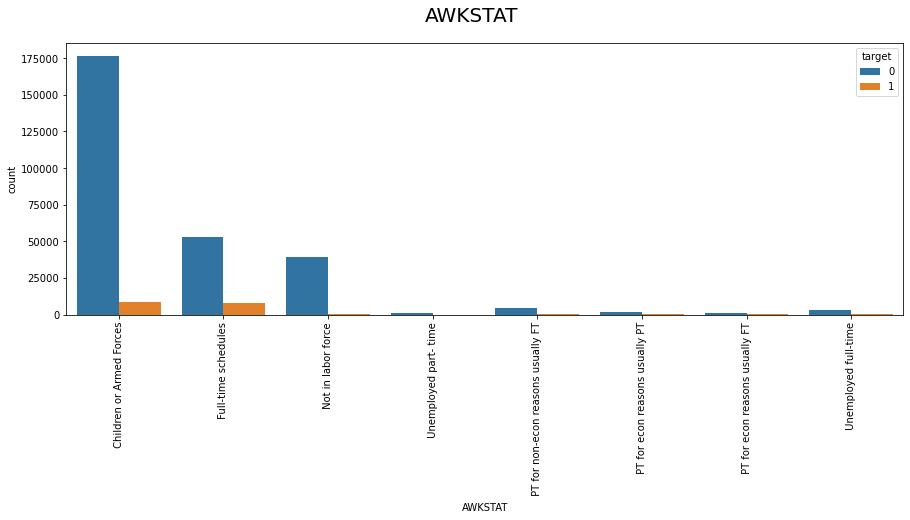

CAPGAIN


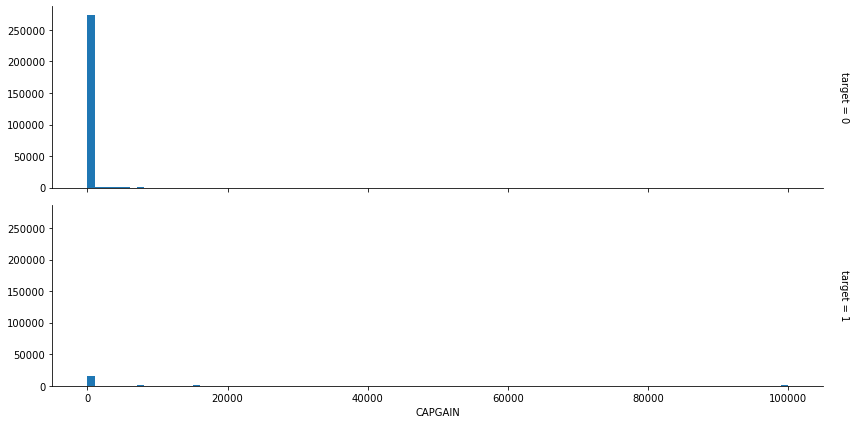

CAPLOSS


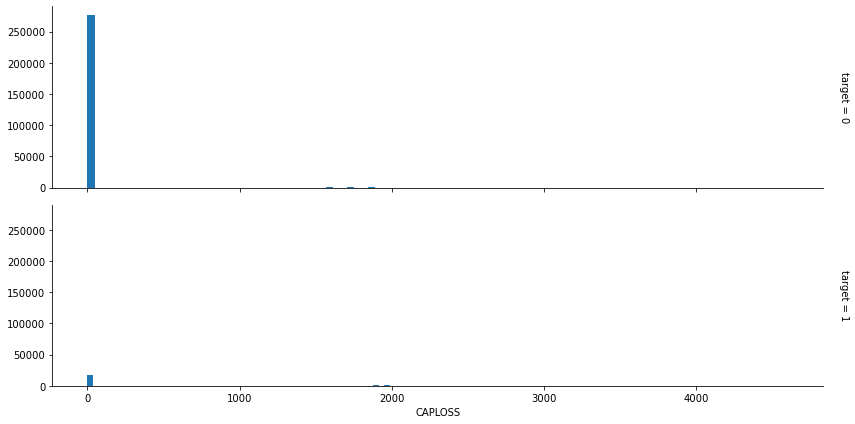

DIVVAL


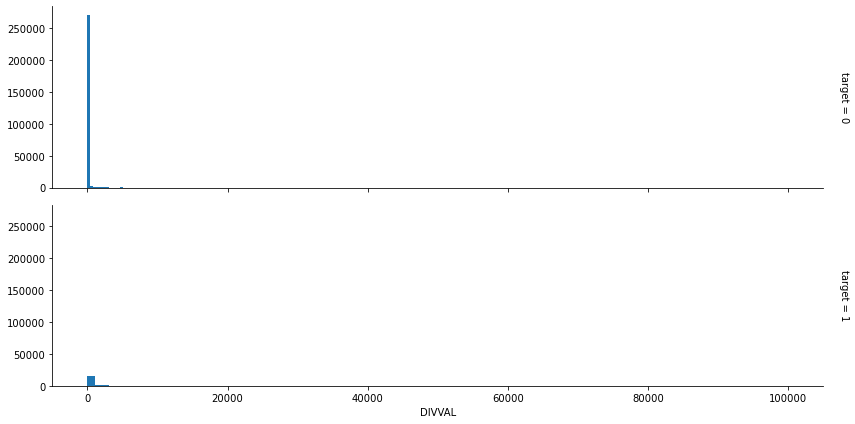

FILESTAT


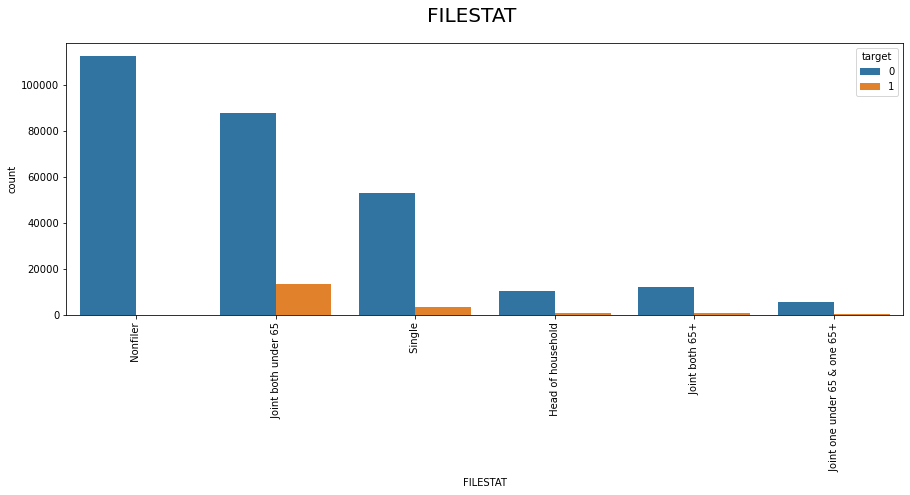

GRINREG


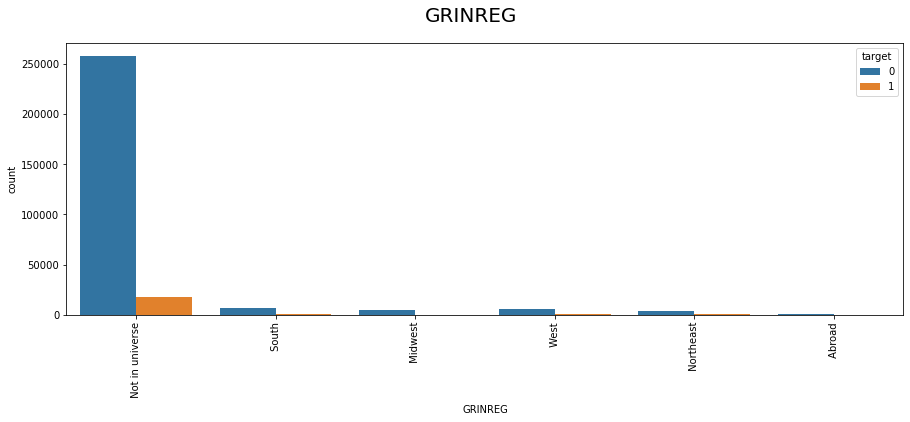

GRINST


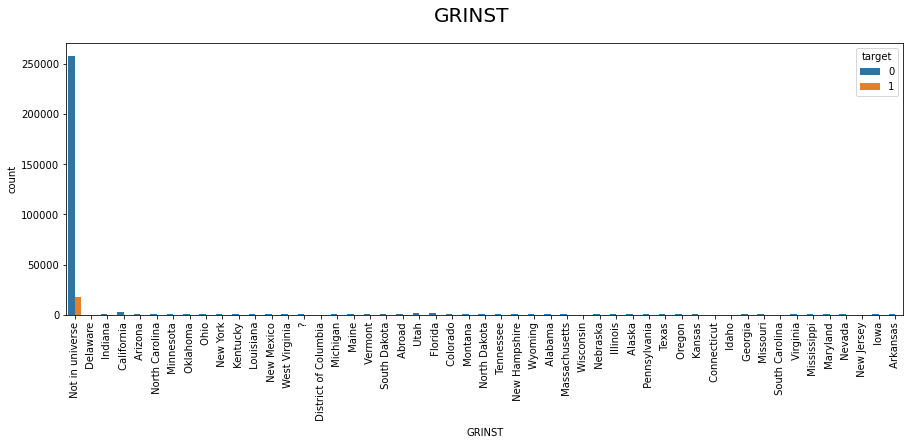

HHDFMX


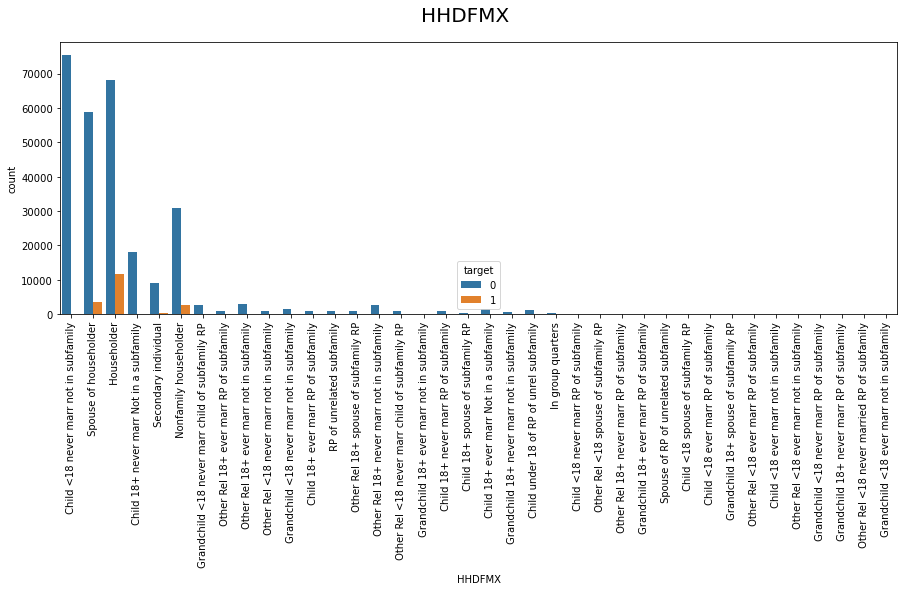

HHDREL


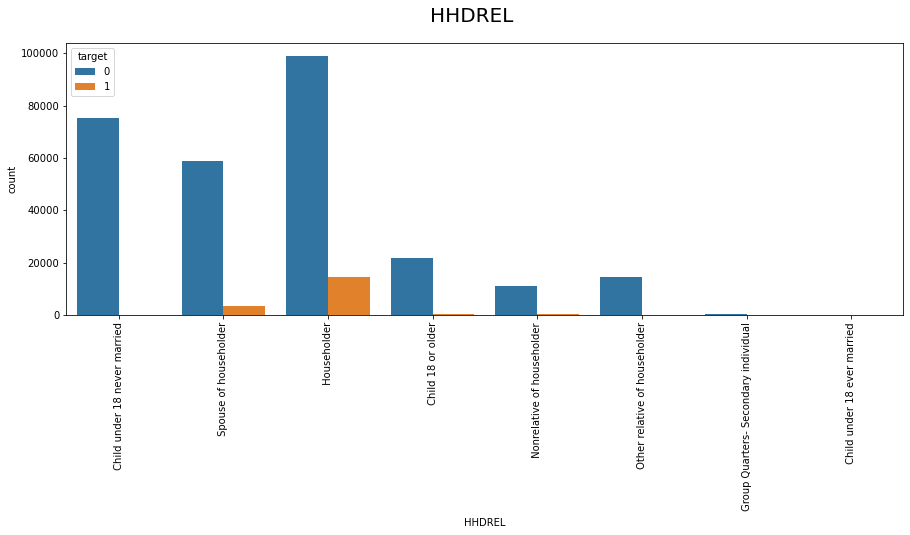

MIGMTR1


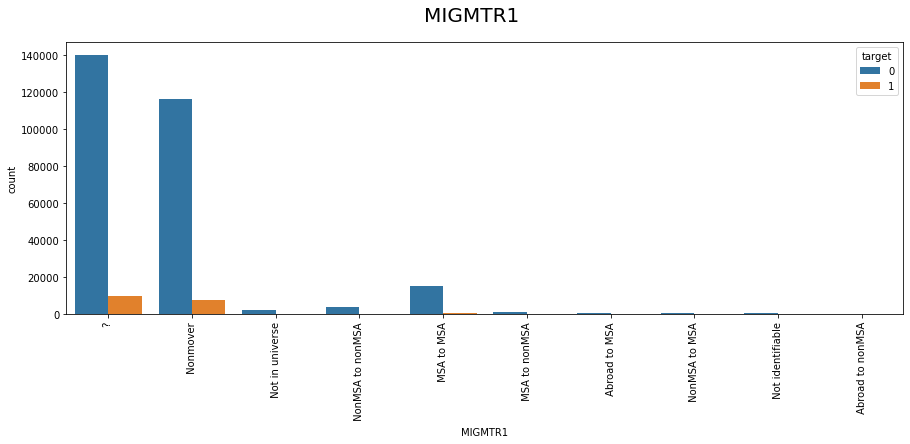

MIGMTR3


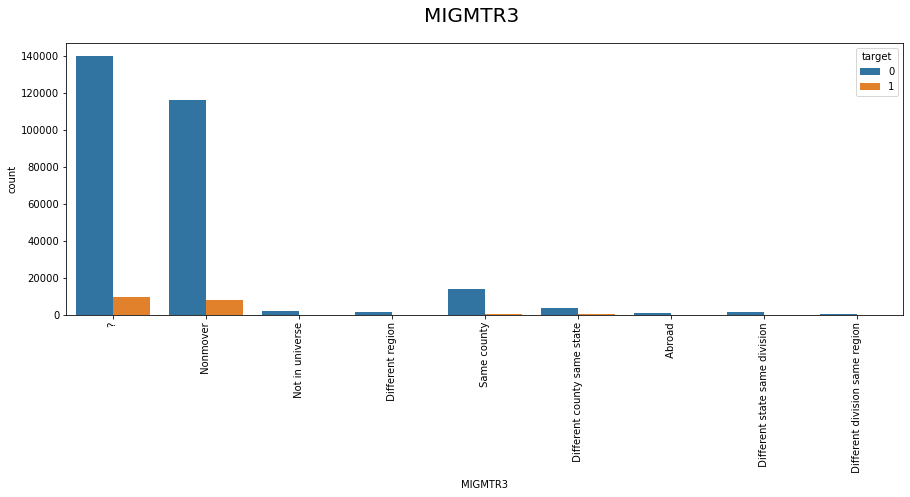

MIGMTR4


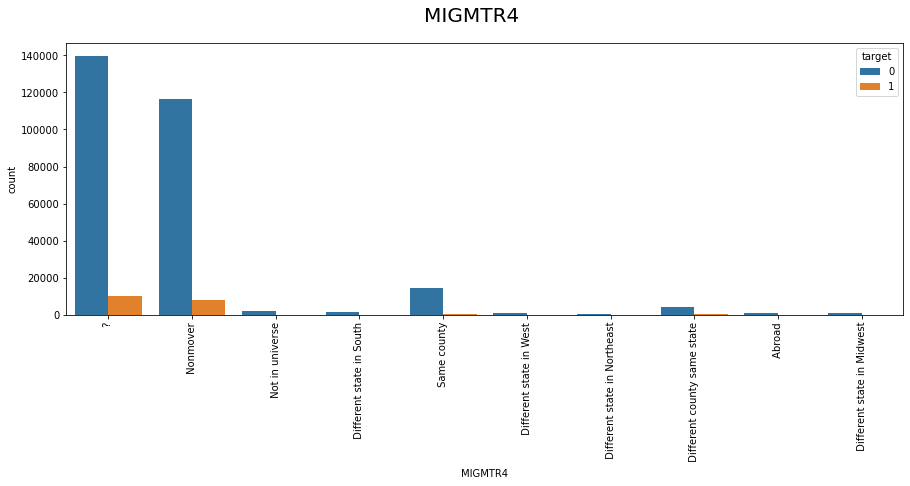

MIGSAME


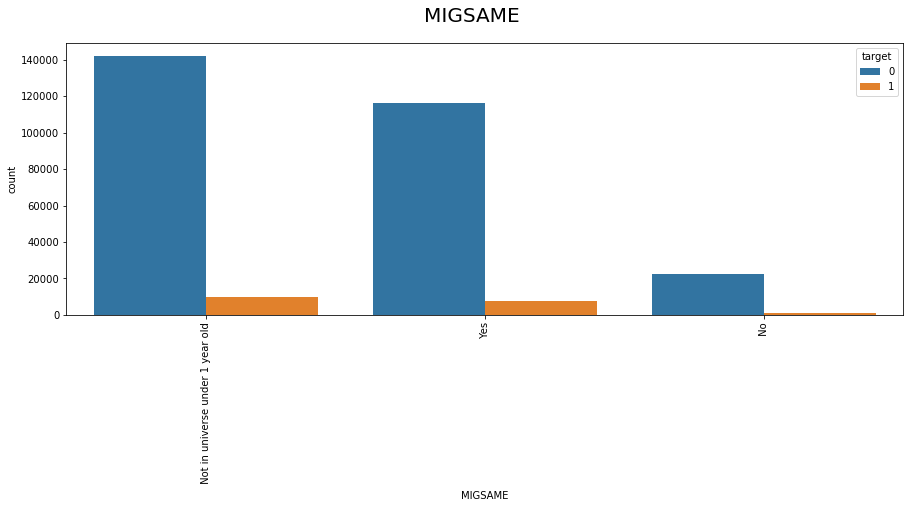

MIGSUN


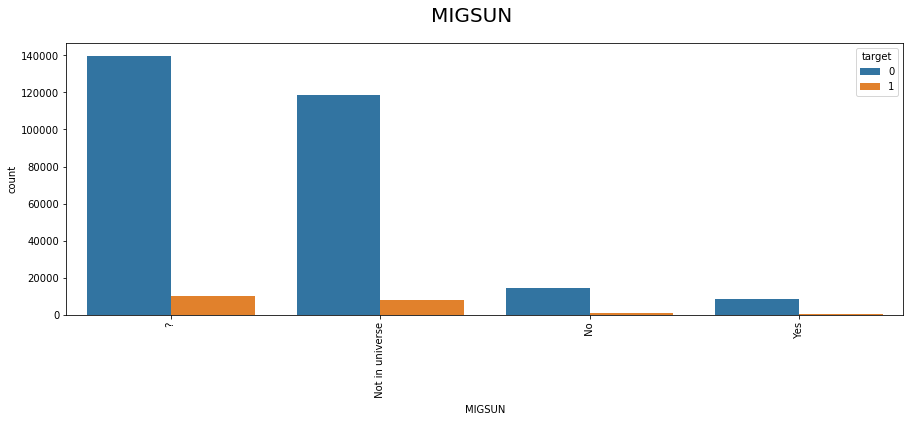

NOEMP


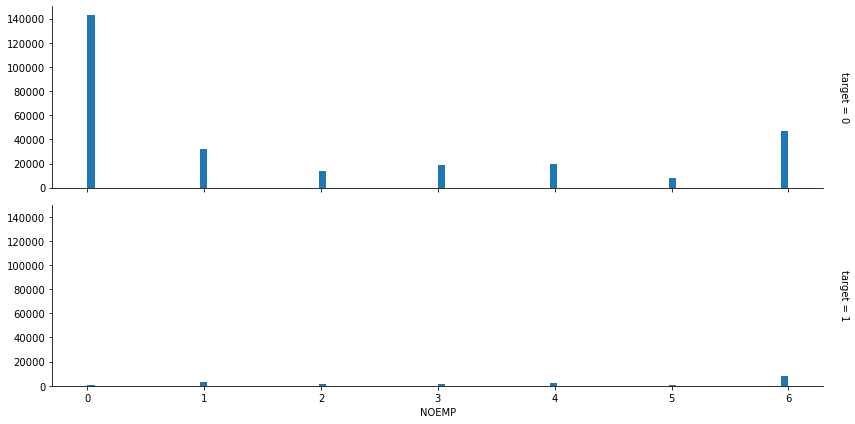

PARENT


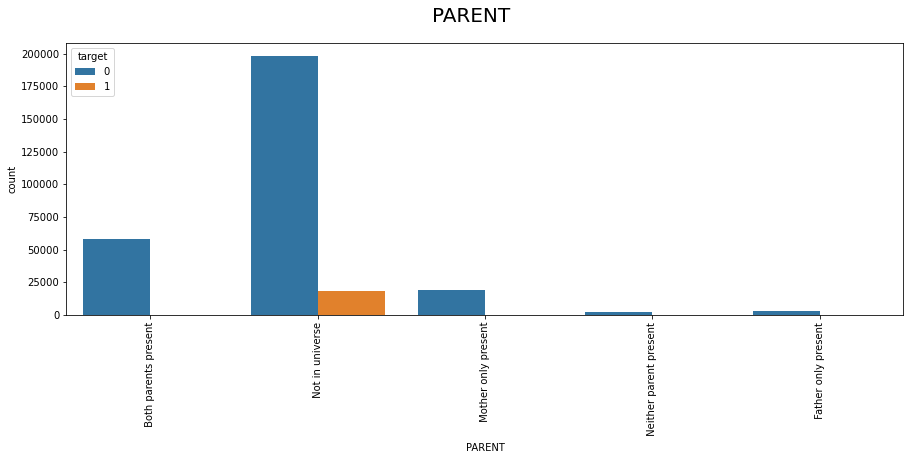

PEFNTVTY


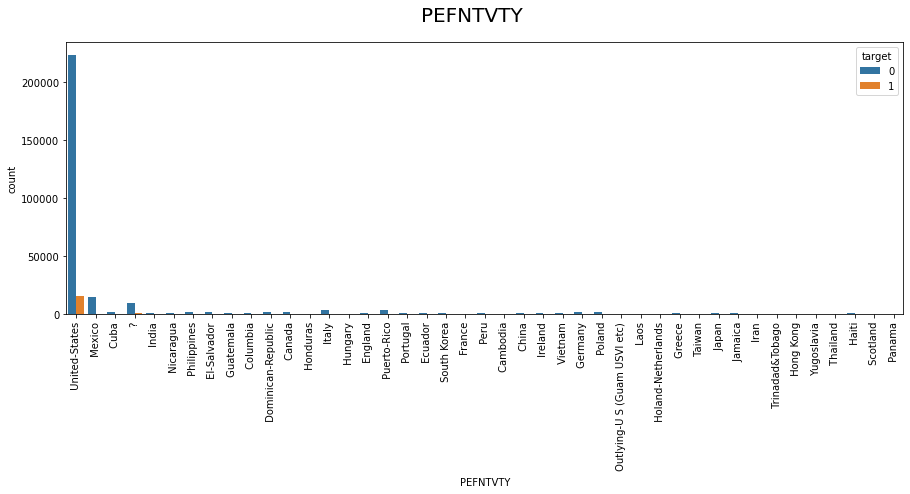

PEMNTVTY


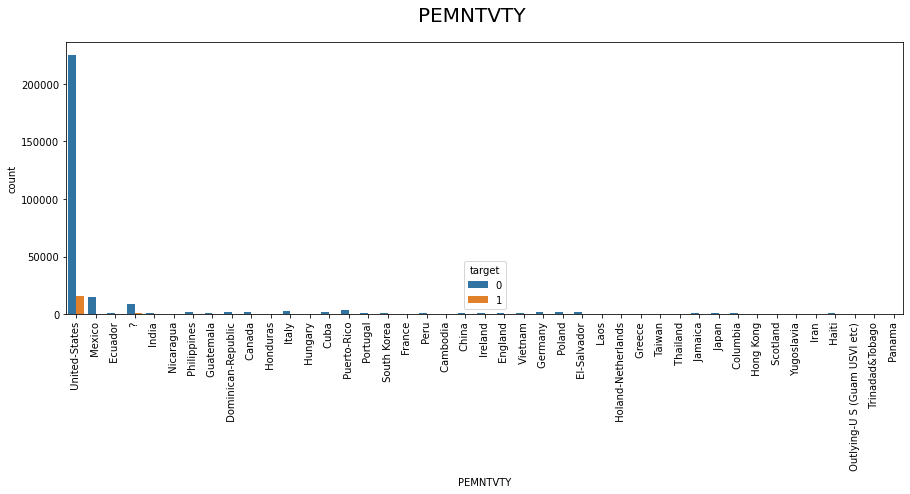

PENATVTY


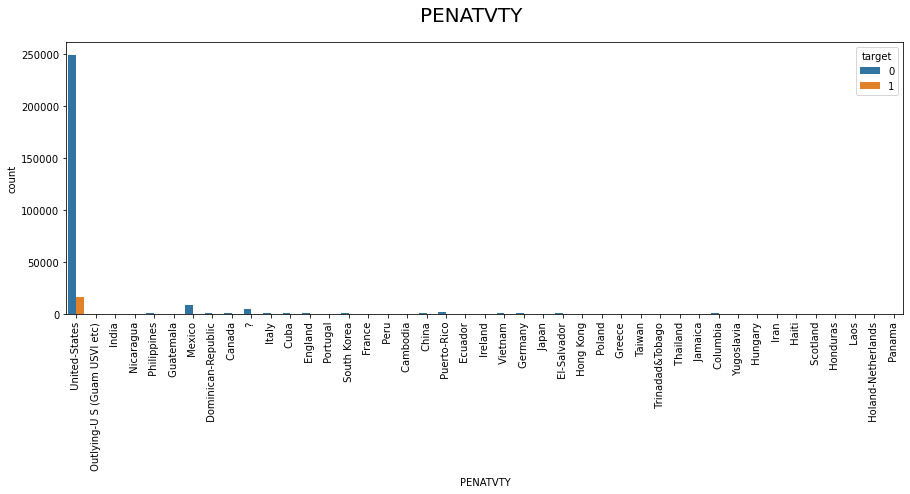

PRCITSHP


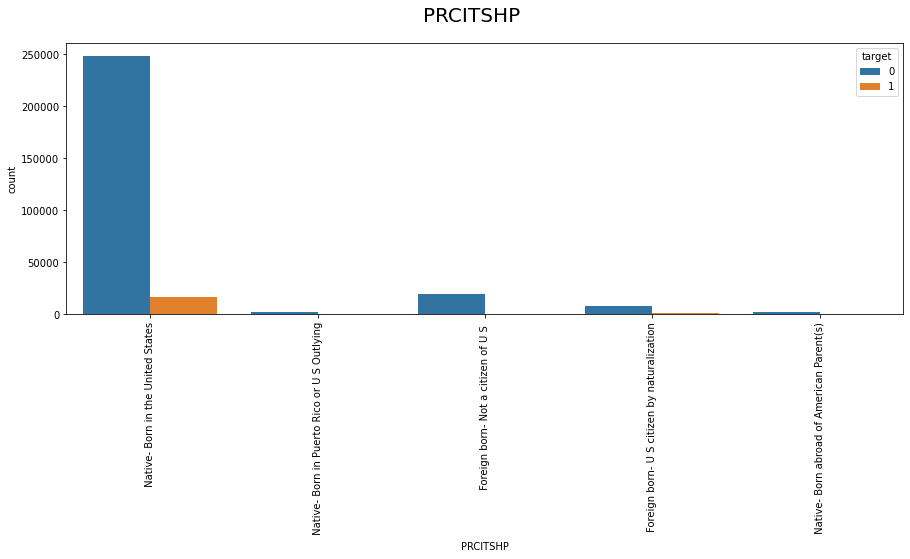

SEOTR


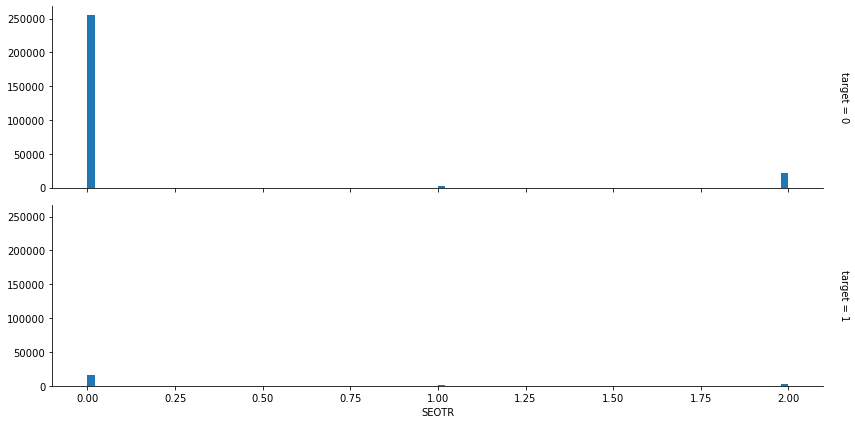

VETQVA


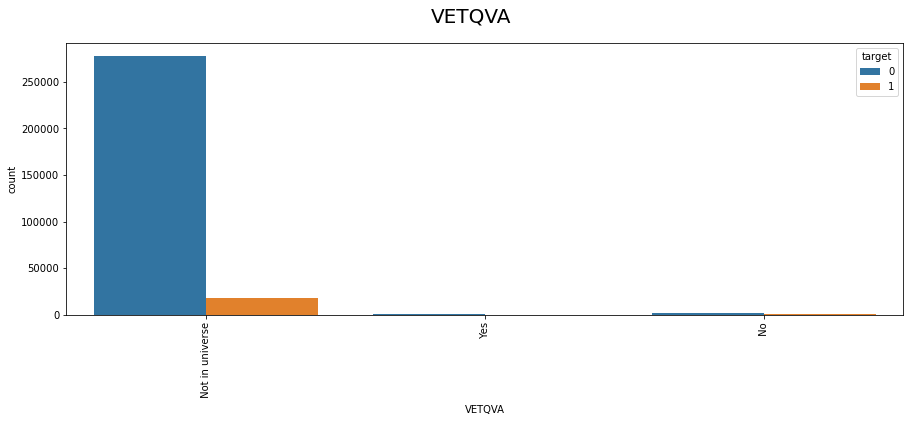

VETYN


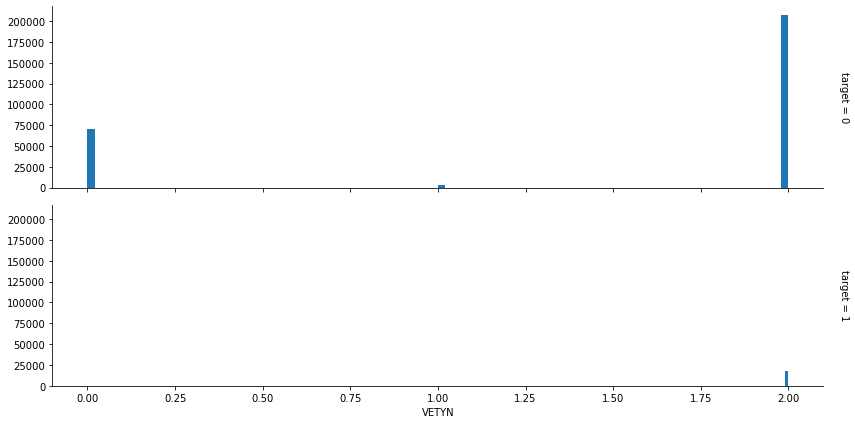

WKSWORK


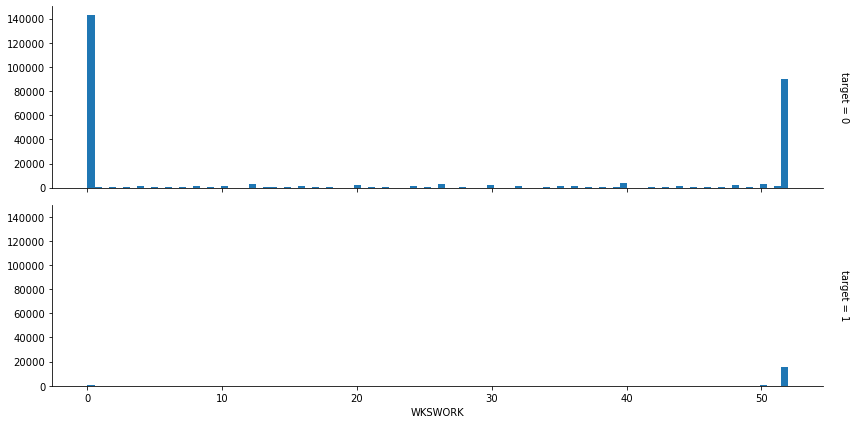

target


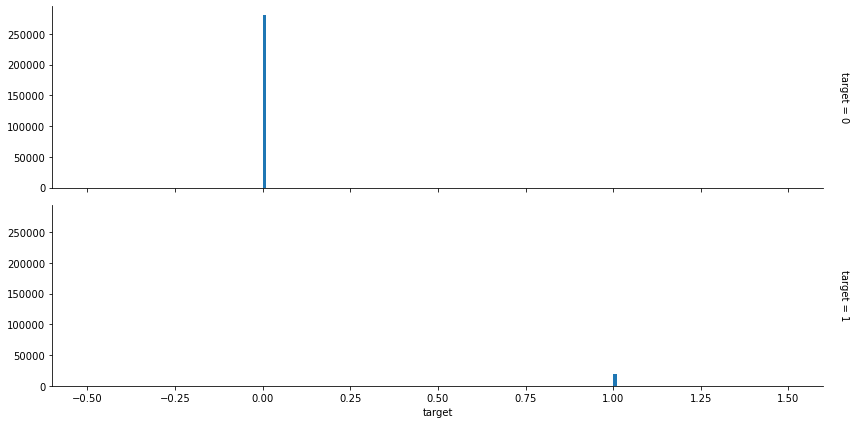

In [26]:
for column in total_data.columns:
    print(f'{column}')
    plot(column)

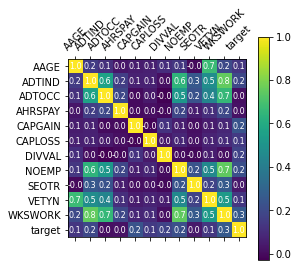

In [28]:
#Ploting the correlation between the output(income) and individual features

plt.matshow(total_data.corr())
plt.colorbar()
plt.xticks(np.arange(len(total_data.corr().columns)), total_data.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(total_data.corr().columns)), total_data.corr().columns.values)

for (i, j), corr in np.ndenumerate(total_data.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=8)

#### 1.1. (8%) Which metric are you going to use to evaluate the performance of the model and why?

I will use simple accuracy_score from sklearn to find the accuracy of the model

#### 1.2. (8%) Which validation strategy are you going to use and why? Apply it to the data on the preprocessing step

I will use different strategies for comparing them: Random Forest, Decision Tree, Logistic Regression, Support Vector Machines

#### 1.3. (9%) Explore which features do you have, what is their distribution and connection to the target. Perform feature selection techniques such as PCA, and feature engineering, if necessary. Explain your decisions

### 2. Data preprocessing

#### 2.1. (8%) Fill missing values (if there are any)

In [30]:
total_data.isna().sum()

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHRSPAY     0
AHSCOL      0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AUNMEM      0
AUNTYPE     0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FILESTAT    0
GRINREG     0
GRINST      0
HHDFMX      0
HHDREL      0
MIGMTR1     0
MIGMTR3     0
MIGMTR4     0
MIGSAME     0
MIGSUN      0
NOEMP       0
PARENT      0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETQVA      0
VETYN       0
WKSWORK     0
target      0
dtype: int64

There are no missing values

#### 2.2. (9%) Properly encode categorical features. Explain your choice of methods of categorical feature encoding

In [32]:
# Categorical boolean mask
categorical_feature_mask = total_data.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = total_data.columns[categorical_feature_mask].tolist()

categorical_cols

['ACLSWKR',
 'AHGA',
 'AHSCOL',
 'AMARITL',
 'AMJIND',
 'AMJOCC',
 'ARACE',
 'AREORGN',
 'ASEX',
 'AUNMEM',
 'AUNTYPE',
 'AWKSTAT',
 'FILESTAT',
 'GRINREG',
 'GRINST',
 'HHDFMX',
 'HHDREL',
 'MIGMTR1',
 'MIGMTR3',
 'MIGMTR4',
 'MIGSAME',
 'MIGSUN',
 'PARENT',
 'PEFNTVTY',
 'PEMNTVTY',
 'PENATVTY',
 'PRCITSHP',
 'VETQVA']

In [35]:
le = LabelEncoder()

# apply le on categorical feature columns
total_data[categorical_cols] = total_data[categorical_cols].apply(lambda col: le.fit_transform(col))
total_data[categorical_cols].head(10)

,ACLSWKR,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,...,MIGMTR3,MIGMTR4,MIGSAME,MIGSUN,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,VETQVA
0,3,10,2,4,14,6,4,0,1,1,...,0,0,1,0,0,40,40,40,4,1
1,3,16,2,2,14,6,4,0,0,1,...,6,7,2,2,4,40,40,40,4,1
2,4,12,2,2,10,8,4,0,1,1,...,6,7,2,2,4,40,40,40,4,1
3,1,12,2,4,6,11,0,0,1,1,...,0,0,1,0,4,40,40,40,4,1
4,4,12,2,2,19,0,4,0,0,1,...,0,0,1,0,4,40,40,40,4,1
5,4,13,2,4,20,7,4,0,1,1,...,0,0,1,0,4,40,40,40,4,1
6,4,12,2,2,2,8,4,0,1,1,...,0,0,1,0,4,40,40,40,4,1
7,3,10,2,4,14,6,4,6,1,1,...,7,8,1,2,0,26,26,40,4,1
8,4,14,2,4,19,7,4,3,0,1,...,0,0,1,0,4,5,7,40,4,1
9,3,1,2,6,14,6,4,0,0,1,...,0,0,1,0,4,40,40,40,4,1


In [37]:
total_data.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,target
0,14,3,0,0,10,0,2,4,14,6,...,0,40,40,40,4,0,1,0,0,0
1,42,3,0,0,16,0,2,2,14,6,...,4,40,40,40,4,2,1,2,13,0
2,49,4,9,35,12,0,2,2,10,8,...,4,40,40,40,4,0,1,2,52,0
3,19,1,40,28,12,0,2,4,6,11,...,4,40,40,40,4,0,1,2,34,0
4,57,4,33,24,12,0,2,2,19,0,...,4,40,40,40,4,0,1,2,52,0


### 3. Model training

3.1. (8%) Apply different techniques which can help to work with imbalanced data. You are supposed to try at least 2 techniques (in the end, you don't have to include them into your final pipeline - but you should explain why)

3.2. (9%) Train different machine learning models, including the advanced boosting algorithms studied during the course. Carefully tune hyperparameters of the algorithms. You are supposed to compare at least 3 models

3.3. (8%) Perform blending or stacking of the trained machine learning algorithms. Carefully tune the weights of the ensemble

In [74]:
def preprocess_data(df):
    df['target'] = df['target'].map({' - 50000.' : 0, ' 50000+.' : 1})
    
    le = LabelEncoder()
    
    categorical_feature_mask = df.dtypes==object
    categorical_cols = df.columns[categorical_feature_mask].tolist()

    df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
    df[categorical_cols].head(10)
    
    y = df['target']
    x = df.drop('target', 1)
    
    return x, y

In [75]:
X_test, y_test = preprocess_data(test_data)

In [79]:
X_train, y_train = preprocess_data(train_data)

In [81]:
#Using StandardScalar to normalise the dataset

scaler = StandardScaler()

X_test  = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

In [82]:
X_train.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK
0,1.322487,-0.439146,-0.849740,-0.782235,-1.222134,-0.201629,0.244533,-0.713995,0.207994,-0.097301,...,-0.827096,0.589025,-2.878939,-2.954768,-3.973857,-2.355192,-0.316851,0.060524,0.569799,-0.949346
1,-0.828933,-0.439146,-0.849740,-0.782235,-0.979469,-0.201629,-2.426254,0.706081,0.207994,-0.097301,...,-0.827096,-1.901181,0.425832,0.417497,0.304933,0.343561,-0.316851,0.060524,0.569799,-0.949346
2,0.470883,0.465605,1.308882,0.532265,-2.435461,-0.201629,0.244533,-0.713995,0.626550,1.835344,...,-0.404284,0.589025,0.425832,0.417497,0.304933,0.343561,-0.316851,0.060524,0.569799,0.853088
3,-0.022151,-0.439146,-0.849740,-0.782235,0.476524,-0.201629,0.244533,-2.134072,0.207994,-0.097301,...,0.441339,0.589025,0.425832,0.417497,0.304933,0.343561,-0.316851,0.060524,0.569799,0.033800
4,0.694990,-2.248650,1.530279,-0.090393,0.961855,-0.201629,0.244533,0.706081,-1.675507,1.191129,...,1.709774,0.589025,0.425832,0.417497,0.304933,0.343561,-0.316851,0.060524,0.569799,1.180804


In [96]:
#Applying the random forest algorithm

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

accuracy_score(y_test, y_pred)

0.9544716425091718

In [95]:
#Applying the Logistic Regression algorithm

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

accuracy_score(y_test, y_pred)

0.947695515326477

In [94]:
#Applying the Support Vector Machine algorithm

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

accuracy_score(y_test, y_pred)

0.9467632966460175

In [93]:
#Applying the Decision Tree algorithm

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

accuracy_score(y_test, y_pred)

0.9317976784747699

In [97]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_log, acc_random_forest, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

,Model
Score,
99.95,Random Forest
99.95,Decision Tree
94.79,Logistic Regression
94.65,Support Vector Machines
